### Data Set Preparation and Cleaning


In [1]:
import sys
sys.path.append('./processing')


from processing.imports import *
from processing.preprocessing import *
from processing.utils import *
from processing.featureExtraction import *


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

import seaborn

import tensorflow as tf
from keras import optimizers
from keras import initializers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from matplotlib import pyplot

%matplotlib inline


Using TensorFlow backend.


In [39]:
datasetFeatures = loadFeatures('dataML.csv')
datasetFeatures = shuffle(datasetFeatures)
datasetFeatures = datasetFeatures.reindex(sorted(datasetFeatures.columns), axis=1)

datasetFeatures = datasetFeatures.dropna()

#df_corr = datasetFeatures.corr()
#plt.figure(figsize=(15,10))
#seaborn.heatmap(df_corr)
#seaborn.set(font_scale=2)
#plt.title('Heatmap correlation')
#plt.show()

In [141]:

#datasetFeatures = tf.keras.utils.normalize(datasetFeatures, axis=-1, order=2)
#columna con la variable de salida
labels = datasetFeatures['rotacion'].reset_index(drop=True)
#labels = pd.get_dummies(data=labels, columns='rotacion', prefix="rotacion")
features = datasetFeatures.drop(['rotacion'], axis=1).reset_index(drop=True)

#features = features.drop(['index','status_deleted','status_discarded','vacant_id','no_studies_True','no_experience_True','candidate_id','id',"gender_empty","gender_other_gender","gender_unknown","no_experience_False","status_active","no_experience_False","no_studies_False"], axis=1)
features = features.drop(['Identificacion', 
                          'Fecha_ingreso', 
                          'Fecha_retiro'], axis=1)

features["duracion_vinculacion"] = features["duracion_vinculacion"].fillna(features["duracion_vinculacion"].mean())

features["Clasificacion_Activo"] = features["Clasificacion_Activo"].fillna(features["Clasificacion_Activo"].mean())
features["Clasificacion_Inactivo"] = features["Clasificacion_Inactivo"].fillna(features["Clasificacion_Inactivo"].mean())

features["ESCALAA_DP"] = features["ESCALAA_DP"].fillna(features["ESCALAA_DP"].mean())
features["ESCALAA_FP"] = features["ESCALAA_FP"].fillna(features["ESCALAA_FP"].mean())
features["ESCALAA_PS"] = features["ESCALAA_PS"].fillna(features["ESCALAA_PS"].mean())#


features["ESCALAC_DP"] = features["ESCALAC_DP"].fillna(features["ESCALAC_DP"].mean())
features["ESCALAC_FP"] = features["ESCALAC_FP"].fillna(features["ESCALAC_FP"].mean())
features["ESCALAC_PS"] = features["ESCALAC_PS"].fillna(features["ESCALAC_PS"].mean())


features["ESCALAE_DP"] = features["ESCALAE_DP"].fillna(features["ESCALAE_DP"].mean())
features["ESCALAE_FP"] = features["ESCALAE_FP"].fillna(features["ESCALAE_FP"].mean())
features["ESCALAE_PS"] = features["ESCALAE_FP"].fillna(features["ESCALAE_FP"].mean())#


features["ESCALAF_DP"] = features["ESCALAF_DP"].fillna(features["ESCALAF_DP"].mean())
features["ESCALAF_FP"] = features["ESCALAF_FP"].fillna(features["ESCALAF_FP"].mean())
features["ESCALAF_PS"] = features["ESCALAF_PS"].fillna(features["ESCALAF_PS"].mean())
features["ESCALAH_DP"] = features["ESCALAH_DP"].fillna(features["ESCALAH_DP"].mean())
features["ESCALAH_FP"] = features["ESCALAH_FP"].fillna(features["ESCALAH_FP"].mean())
features["ESCALAH_PS"] = features["ESCALAH_PS"].fillna(features["ESCALAH_PS"].mean())


features["contrato_Aprendiz"] = features["contrato_Aprendiz"].fillna(features["contrato_Aprendiz"].mean())

features["contrato_Termino fijo >= 3 Meses"] = features["contrato_Termino fijo >= 3 Meses"].fillna(features["contrato_Termino fijo >= 3 Meses"].mean())
features["contrato_Termino Fijo < 3 Meses"] = features["contrato_Termino Fijo < 3 Meses"].fillna(features["contrato_Termino Fijo < 3 Meses"].mean())
features["contrato_Indefinido"] = features["contrato_Indefinido"].fillna(features["contrato_Indefinido"].mean())
features["RESPS"] = features["RESPS"].fillna(features["RESPS"].mean())
features["RESPQ"] = features["RESPQ"].fillna(features["RESPQ"].mean())

features["RESPH"] = features["RESPH"].fillna(features["RESPH"].mean())
features["RESPF"] = features["RESPF"].fillna(features["RESPF"].mean())
features["RESPE"] = features["RESPE"].fillna(features["RESPE"].mean())

features["RESPC"] = features["RESPC"].fillna(features["RESPC"].mean())
features["RESPA"] = features["RESPA"].fillna(features["RESPA"].mean())
features["RESPE"] = features["RESPE"].fillna(features["RESPE"].mean())

features["ITPC_PS"] = features["ITPC_PS"].fillna(features["ITPC_PS"].mean())
features["ITPC_FP"] = features["ITPC_FP"].fillna(features["ITPC_FP"].mean())
features["ITPC_DP"] = features["ITPC_DP"].fillna(features["ITPC_DP"].mean())

features["ESCALAS_PS"] = features["ESCALAS_PS"].fillna(features["ESCALAS_PS"].mean())
features["ESCALAS_FP"] = features["ESCALAS_FP"].fillna(features["ESCALAS_FP"].mean())
features["ESCALAS_DP"] = features["ESCALAS_DP"].fillna(features["ESCALAS_DP"].mean())

features["ESCALAQ_PS"] = features["ESCALAQ_PS"].fillna(features["ESCALAQ_PS"].mean())
features["ESCALAQ_FP"] = features["ESCALAQ_FP"].fillna(features["ESCALAQ_FP"].mean())
features["ESCALAQ_DP"] = features["ESCALAQ_DP"].fillna(features["ESCALAQ_DP"].mean())


features = features.astype(float)


#normalized_features = tf.keras.utils.normalize(features, axis=-1, order=2)
from sklearn.preprocessing import Normalizer
from joblib import dump, load

normalizer = Normalizer()
normalizer.fit(features)

normalized_features = normalizer.transform(features)

dump(normalizer, 'scaler.gz')


['scaler.gz']

In [142]:


from keras.regularizers import l2


X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.2, random_state=1) 


model = Sequential()
opt = optimizers.Adam(lr=0.00001)

initializer = initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None)

model.add(Dense(500,  input_dim=normalized_features.shape[1], activation="tanh",kernel_regularizer=l2(0.01)))
#model.add(Dense(units=100, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
model.add(Dense(units=5, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
model.add(Dense(1, activation='tanh'))



model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])                   
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=15)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=5,verbose=1,callbacks=[es])

model.save_weights('model.h5')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)




Train on 4525 samples, validate on 1132 samples
Epoch 1/75
4525/4525 [==============================] - 3s 606us/step - loss: 0.7670 - accuracy: 0.8486 - val_loss: 0.6788 - val_accuracy: 0.9072
Epoch 2/75
4525/4525 [==============================] - 3s 577us/step - loss: 0.6209 - accuracy: 0.9134 - val_loss: 0.5706 - val_accuracy: 0.9090
Epoch 3/75
4525/4525 [==============================] - 2s 535us/step - loss: 0.5236 - accuracy: 0.9158 - val_loss: 0.4821 - val_accuracy: 0.9187
Epoch 4/75
4525/4525 [==============================] - 3s 615us/step - loss: 0.4432 - accuracy: 0.9165 - val_loss: 0.4090 - val_accuracy: 0.9170
Epoch 5/75
4525/4525 [==============================] - 3s 638us/step - loss: 0.3767 - accuracy: 0.9180 - val_loss: 0.3491 - val_accuracy: 0.9170
Epoch 6/75
4525/4525 [==============================] - 3s 558us/step - loss: 0.3222 - accuracy: 0.9211 - val_loss: 0.2999 - val_accuracy: 0.9214
Epoch 7/75
4525/4525 [==============================] - 3s 553us/step - loss

Train: 0.934, Test: 0.935


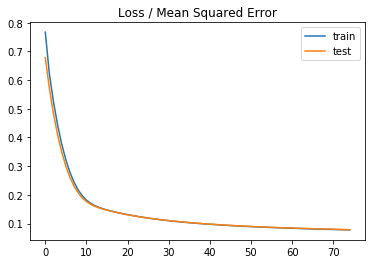

In [143]:

# evaluate the model

_,train_mse = model.evaluate(X_train, y_train, verbose=0)
_,test_mse = model.evaluate(X_test, y_test, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## opcion 2: SVM

In [ ]:
from sklearn import svm
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1) 

#Create a svm Classifier
modelSVM = svm.SVC(gamma=2, C=1) # Linear Kernel

#Train the model using the training sets
modelSVM.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = modelSVM.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:

dump(modelSVM, 'SVMmodel.joblib') 

In [ ]:
opt = optimizers.Adam(lr=0.000001)

initializer = initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None)

encoder.add(Dense(100,  input_dim=normalized_features.shape[1], activation="tanh"))
encoder.add(Dropout(0.1))
encoder.add(Dense(units=30, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
encoder.add(Dropout(0.1))
encoder.add(Dense(units=5, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
encoder.add(Dense(5, activation='tanh'))

decoder = Sequential()

decoder.add(Dense(5,  input_dim=5, activation="tanh"))
decoder.add(Dropout(0.1))
decoder.add(Dense(units=30, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
decoder.add(Dropout(0.1))
decoder.add(Dense(units=5, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
decoder.add(Dense(1, activation='sigmoid'))

model = Sequential([encoder,decoder])

In [ ]:


from keras.regularizers import l2


X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.2, random_state=1) 


model = Sequential()
opt = optimizers.Adam(lr=0.000001)

initializer = initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None)

model.add(Dense(50,  input_dim=normalized_features.shape[1], activation="tanh"))
model.add(Dense(units=5, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
model.add(Dense(units=20, activation="tanh", kernel_initializer=initializer, bias_initializer="ones"))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])                   
es = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100,verbose=1,callbacks=[es])

model.save_weights('model.h5')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


